In [1]:
#Import necessary packages and load Keras using PyTorch
import warnings
warnings.filterwarnings('ignore')

import torch
import os
os.environ["KERAS_BACKEND"] = "torch"

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

#import keras
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [2]:
#Load dataset
dfd = pd.read_csv("delhi_air_quality.csv")
dfd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2457 entries, 0 to 2456
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   date       2457 non-null   object
 1    pm25      2457 non-null   object
 2    pm10      2457 non-null   object
 3    o3        2457 non-null   object
 4    no2       2457 non-null   object
 5    so2       2457 non-null   object
 6    co        2457 non-null   object
 7   aqi score  2457 non-null   int64 
 8   quality    2457 non-null   object
dtypes: int64(1), object(8)
memory usage: 172.9+ KB


In [3]:
dfd

,date,pm25,pm10,o3,no2,so2,co,aqi score,quality
0,6/3/2018,,115,17,17,5,8,115,Unhealthy for Sensitive Groups
1,6/4/2018,145,136,17,15,6,8,145,Unhealthy for Sensitive Groups
2,6/5/2018,143,113,13,15,3,8,143,Unhealthy for Sensitive Groups
3,6/6/2018,125,133,8,13,5,9,133,Unhealthy for Sensitive Groups
4,6/7/2018,139,171,8,19,7,11,171,Unhealthy
...,...,...,...,...,...,...,...,...,...
2452,3/3/2025,137,138,34,21,3,4,138,Unhealthy for Sensitive Groups
2453,3/4/2025,168,122,26,16,2,3,168,Unhealthy
2454,3/5/2025,146,122,25,11,2,2,146,Unhealthy for Sensitive Groups
2455,3/6/2025,99,116,33,15,3,2,116,Unhealthy for Sensitive Groups


In [5]:
dfl = pd.read_csv("london_air_quality.csv")
dfl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4080 entries, 0 to 4079
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    4080 non-null   object
 1    pm25   4080 non-null   object
 2    pm10   4080 non-null   object
 3    o3     4080 non-null   object
 4    no2    4080 non-null   object
 5    so2    4080 non-null   object
 6    co     4080 non-null   object
dtypes: object(7)
memory usage: 223.2+ KB


In [6]:
dfl

,date,pm25,pm10,o3,no2,so2,co
0,1/1/2014,40,16,29,23,6,4
1,1/2/2014,37,20,26,29,11,5
2,1/3/2014,46,27,31,28,3,5
3,1/4/2014,49,18,27,27,3,5
4,1/5/2014,48,15,24,27,3,5
...,...,...,...,...,...,...,...
4075,3/5/2025,88,51,29,28,,3
4076,3/6/2025,116,50,39,32,1,4
4077,3/7/2025,103,31,30,21,,2
4078,3/8/2025,54,32,40,21,1,2


In [7]:
dfp = pd.read_csv("portland_air_quality.csv")
dfp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3652 entries, 0 to 3651
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    3652 non-null   object
 1    pm25   3652 non-null   object
 2    pm10   3652 non-null   object
 3    o3     3652 non-null   object
 4    no2    3652 non-null   object
 5    so2    3652 non-null   object
 6    co     3652 non-null   object
dtypes: object(7)
memory usage: 199.8+ KB


In [8]:
dfp

,date,pm25,pm10,o3,no2,so2,co
0,2/10/2014,,29,,,,
1,2/11/2014,75,10,,,,
2,2/12/2014,20,10,,,,
3,2/13/2014,18,9,,,,
4,2/14/2014,17,11,,,,
...,...,...,...,...,...,...,...
3647,3/2/2025,41,,,4,,
3648,3/3/2025,21,,,6,,
3649,3/4/2025,25,,,11,,
3650,3/5/2025,78,,,16,,


In [9]:
def clean_data(df):
    #Convert empty strings to NaN
    df = df.replace(" ", float("NaN"))  
    
    #Make new dataframe
    df2 = pd.DataFrame()
    
    #Create new columns
    df2["date"] = pd.to_datetime(df["date"])
    
    df["month"] = df2["date"].dt.month
    df2["season"] = df["month"].apply(lambda x: "Winter" if x in [12, 1, 2] else
                                     "Spring" if x in [3, 4, 5] else
                                     "Summer" if x in [6, 7, 8] else "Fall")
    
    #Convert types
    df2["pm25"] = df[" pm25"].astype(float)
    df2["pm10"] = df[" pm10"].astype(float)
    df2["o3"] = df[" o3"].astype(float)
    df2["no2"] = df[" no2"].astype(float)
    df2["so2"] = df[" so2"].astype(float)
    df2["co"] = df[" co"].astype(float)
    
    #Set "Date" as the index column
    df2.set_index('date', inplace=True)

    df2.sort_index(inplace=True)

    for x in df2.columns:
        if pd.isna(df2[x][0]):
            df2[x][0] = df2[x].median()
    
    #Interpolate missing values
    df2 = df2.interpolate(method='time')

    return df2

In [10]:
dfd = clean_data(dfd)
dfd

,season,pm25,pm10,o3,no2,so2,co
date,,,,,,,
2018-06-03,Summer,165.0,115.0,17.0,17.0,5.0,8.0
2018-06-04,Summer,145.0,136.0,17.0,15.0,6.0,8.0
2018-06-05,Summer,143.0,113.0,13.0,15.0,3.0,8.0
2018-06-06,Summer,125.0,133.0,8.0,13.0,5.0,9.0
2018-06-07,Summer,139.0,171.0,8.0,19.0,7.0,11.0
...,...,...,...,...,...,...,...
2025-03-03,Spring,137.0,138.0,34.0,21.0,3.0,4.0
2025-03-04,Spring,168.0,122.0,26.0,16.0,2.0,3.0
2025-03-05,Spring,146.0,122.0,25.0,11.0,2.0,2.0


In [11]:
dfl = clean_data(dfl)
dfl

,season,pm25,pm10,o3,no2,so2,co
date,,,,,,,
2014-01-01,Winter,40.0,16.0,29.0,23.0,6.000,4.0
2014-01-02,Winter,37.0,20.0,26.0,29.0,11.000,5.0
2014-01-03,Winter,46.0,27.0,31.0,28.0,3.000,5.0
2014-01-04,Winter,49.0,18.0,27.0,27.0,3.000,5.0
2014-01-05,Winter,48.0,15.0,24.0,27.0,3.000,5.0
...,...,...,...,...,...,...,...
2025-03-05,Spring,88.0,51.0,29.0,28.0,1.125,3.0
2025-03-06,Spring,116.0,50.0,39.0,32.0,1.000,4.0
2025-03-07,Spring,103.0,31.0,30.0,21.0,1.000,2.0


In [12]:
dfp = clean_data(dfp)
dfp

,season,pm25,pm10,o3,no2,so2,co
date,,,,,,,
2014-02-10,Winter,21.0,29.0,23.000000,5.000000,1.0,2.0
2014-02-11,Winter,75.0,10.0,22.994220,5.005900,1.0,2.0
2014-02-12,Winter,20.0,10.0,22.988439,5.011799,1.0,2.0
2014-02-13,Winter,18.0,9.0,22.982659,5.017699,1.0,2.0
2014-02-14,Winter,17.0,11.0,22.976879,5.023599,1.0,2.0
...,...,...,...,...,...,...,...
2025-03-02,Spring,41.0,9.0,1.000000,4.000000,1.0,33.0
2025-03-03,Spring,21.0,9.0,1.000000,6.000000,1.0,33.0
2025-03-04,Spring,25.0,9.0,1.000000,11.000000,1.0,33.0


In [39]:
from scipy.stats import ttest_ind

def ttest(df, split_date):
    before = df.loc[df.index < split_date, 'pm25']
    after = df.loc[df.index >= split_date, 'pm25']

    # Perform independent t-test
    t_stat, p_value = ttest_ind(before, after)
    
    print("PM25:")
    print(f"P-value: {p_value * 10000}")
    print()
    
    before = df.loc[df.index < split_date, 'pm10']
    after = df.loc[df.index >= split_date, 'pm10']

    # Perform independent t-test
    t_stat, p_value = ttest_ind(before, after)
    
    print("PM10:")
    print(f"P-value: {p_value * 10000}")
    print()

    before = df.loc[df.index < split_date, 'o3']
    after = df.loc[df.index >= split_date, 'o3']

    # Perform independent t-test
    t_stat, p_value = ttest_ind(before, after)
    
    print("O3:")
    print(f"P-value: {p_value * 10000}")
    print()
    
    before = df.loc[df.index < split_date, 'no2']
    after = df.loc[df.index >= split_date, 'no2']

    # Perform independent t-test
    t_stat, p_value = ttest_ind(before, after)
    
    print("NO2:")
    print(f"P-value: {p_value * 10000}")
    print()

    before = df.loc[df.index < split_date, 'so2']
    after = df.loc[df.index >= split_date, 'so2']

    # Perform independent t-test
    t_stat, p_value = ttest_ind(before, after)
    
    print("SO2:")
    print(f"P-value: {p_value * 10000}")
    print()
    
    before = df.loc[df.index < split_date, 'co']
    after = df.loc[df.index >= split_date, 'co']

    # Perform independent t-test
    t_stat, p_value = ttest_ind(before, after)
    
    print("CO:")
    print(f"P-value: {p_value * 10000}")
    print()

In [40]:
# Split at a certain date
split_date_d = '2019-01-01'
split_date_l = '2019-04-08'
split_date_p = '2016-01-01'

print("Delhi, India")
ttest(dfd, split_date_d)

Delhi, India
PM25:
P-value: 2983.148781568324

PM10:
P-value: 0.001306201612438343

O3:
P-value: 3.632816558989374e-07

NO2:
P-value: 4871.730484577086

SO2:
P-value: 1.6433036875498966e-07

CO:
P-value: 0.2375359409061442



In [41]:
print("London, England")
ttest(dfl, split_date_l)

London, England
PM25:
P-value: 1.1724341344749878e-189

PM10:
P-value: 3.909877294622071e-117

O3:
P-value: 0.406046167179808

NO2:
P-value: 0.0

SO2:
P-value: 4.233541388771196e-191

CO:
P-value: 6.466415169154106e-102



#### London all but O3 are significantly different. No others in other ones are (Portland is too sparse).

In [42]:
print("Portland, Oregon")
ttest(dfp, split_date_p)

Portland, Oregon
PM25:
P-value: 6278.8420689558725

PM10:
P-value: 8.101102750924113e-87

O3:
P-value: 1.631077638899711e-294

NO2:
P-value: 2.6720151384242834e-05

SO2:
P-value: 889.8866156105624

CO:
P-value: 7.128472448788977e-111



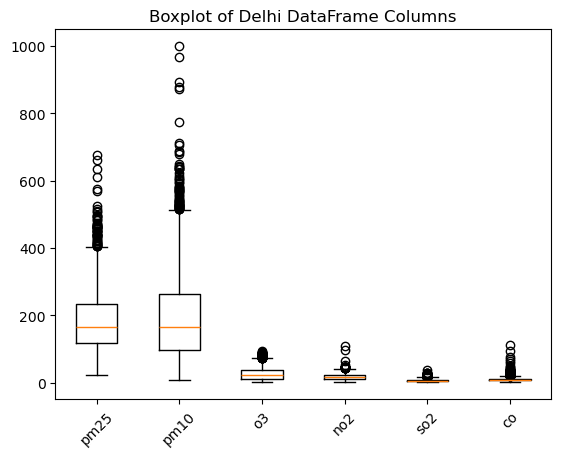

In [12]:
#Delhi Boxplot
plt.boxplot([dfd[x].dropna() for x in dfd.columns], labels=dfd.columns)
plt.xticks(rotation=45)
plt.title('Boxplot of Delhi DataFrame Columns')
plt.show()

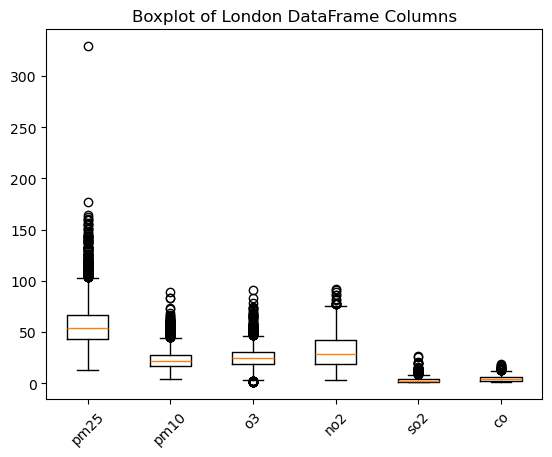

In [13]:
#London Boxplot
plt.boxplot([dfl[x].dropna() for x in dfl.columns], labels=dfl.columns)
plt.xticks(rotation=45)
plt.title('Boxplot of London DataFrame Columns')
plt.show()

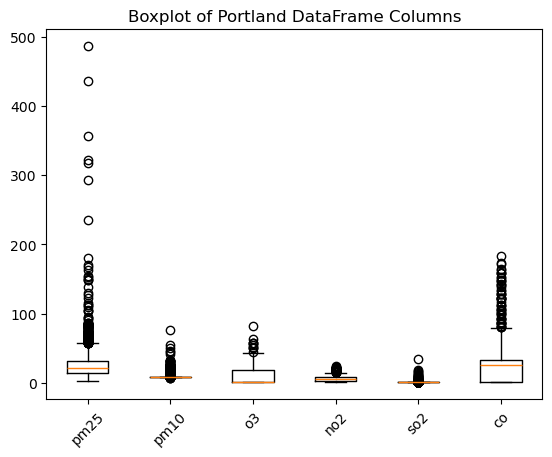

In [14]:
#Portland Boxplot
plt.boxplot([dfp[x].dropna() for x in dfp.columns], labels=dfp.columns)
plt.xticks(rotation=45)
plt.title('Boxplot of Portland DataFrame Columns')
plt.show()

In [15]:
#Select features for detection
features = ["pm25", "pm10", "o3", "no2", "so2", "co"]

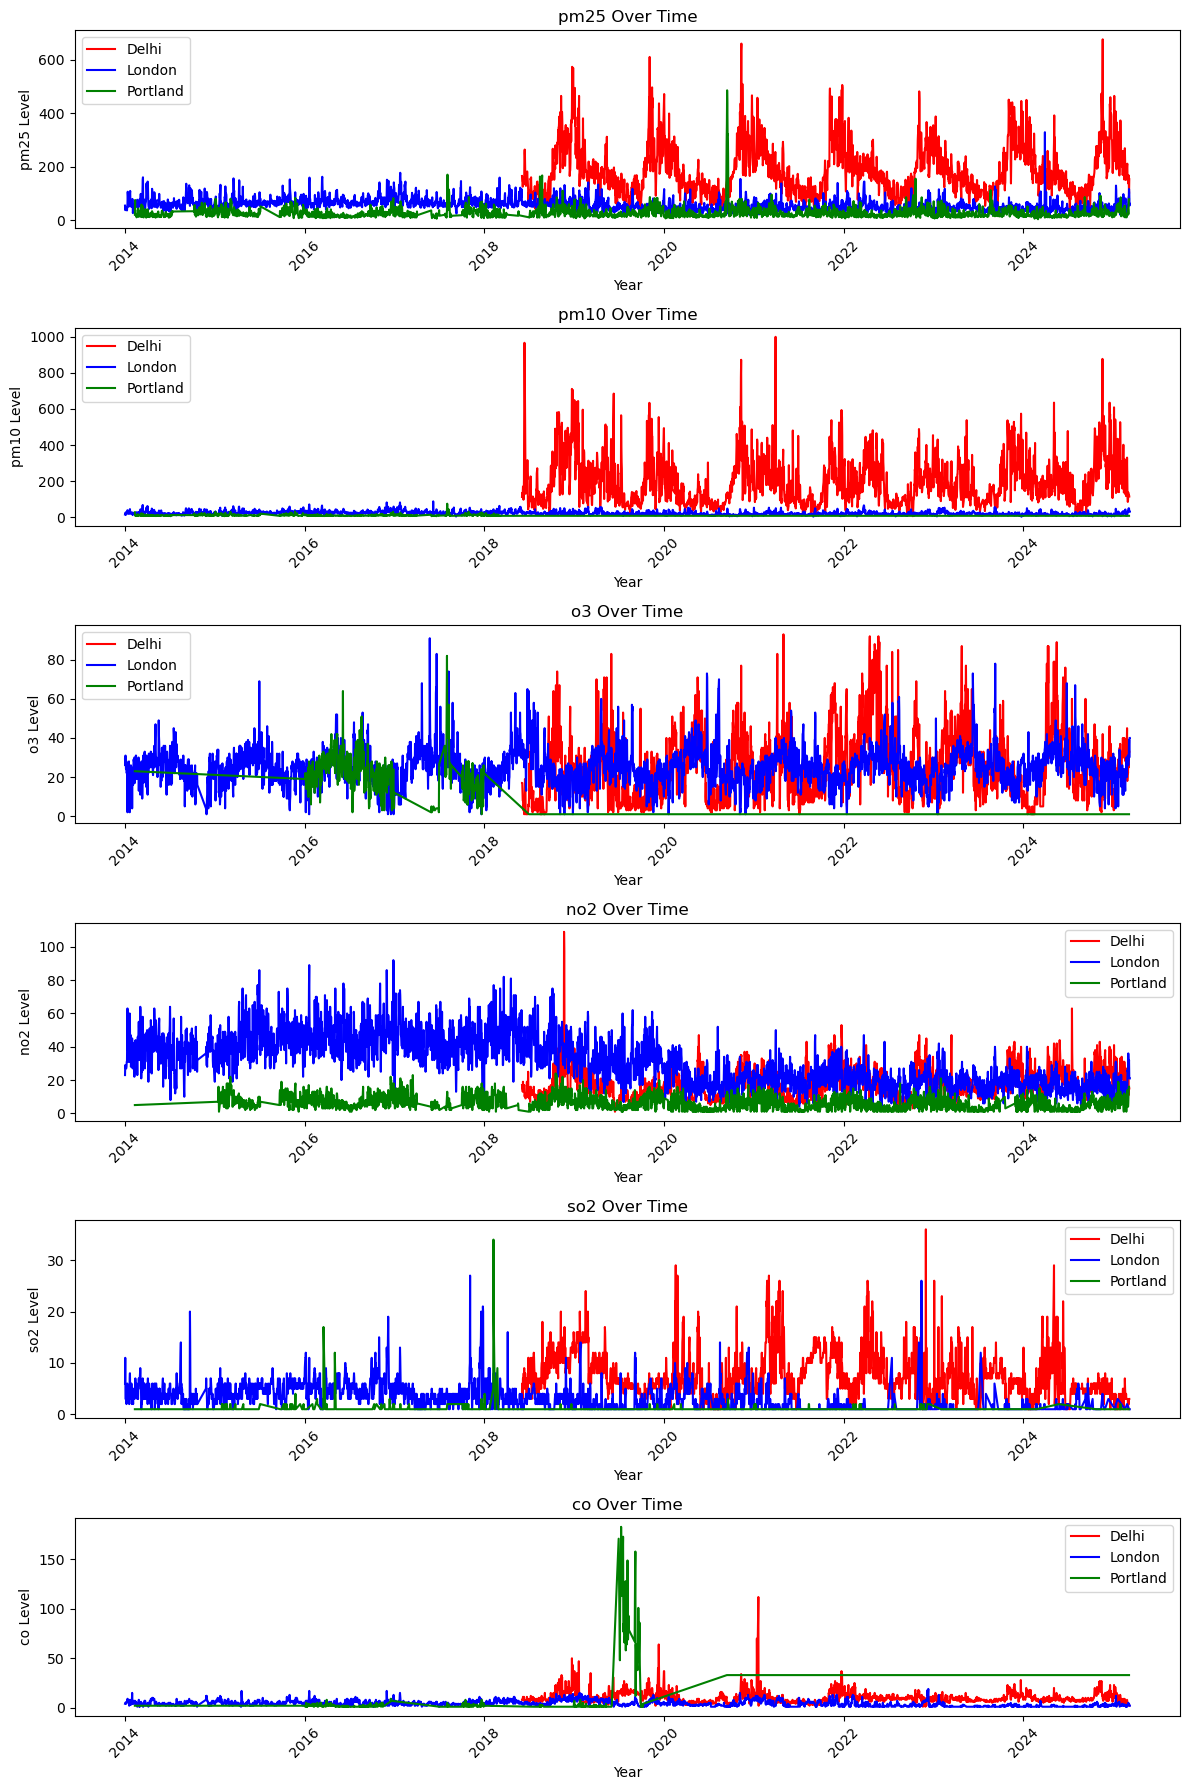

In [16]:
#Plot comparisons of locations
plt.figure(figsize=(12, 18))

for i, pollutant in enumerate(features):
    plt.subplot(6, 1, i + 1)
    plt.plot(dfd.index, dfd.iloc[:, i], color='red', label='Delhi')
    plt.plot(dfl.index, dfl.iloc[:, i], color='blue', label='London')
    plt.plot(dfp.index, dfp.iloc[:, i], color='green', label='Portland')

    plt.xlabel('Year')
    plt.ylabel(f'{pollutant} Level')
    plt.title(f'{pollutant} Over Time')
    plt.legend()
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [17]:
def train_test_split(df2, features):
    #Normalize pollutant levels
    scaler = StandardScaler()
    df2[features] = scaler.fit_transform(df2[features])
    
    #Train-Test Split (80% Train, 20% Test)
    train_size = int(len(df2) * 0.8)
    train, test = df2.iloc[:train_size], df2.iloc[train_size:]

    return train, test, train_size, scaler

In [18]:
#Perform train-test split
train_d, test_d, train_size_d, scaler_d = train_test_split(dfd, features)
train_l, test_l, train_size_l, scaler_l = train_test_split(dfl, features)
train_p, test_p, train_size_p, scaler_p = train_test_split(dfp, features)

In [19]:
#Convert to LSTM-compatible format
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
        
    return np.array(X), np.array(y)

In [20]:
seq_length_d = min(20, len(dfd) // 10)
seq_length_l = min(20, len(dfl) // 10)  #Adjust dynamically based on dataset size
seq_length_p = min(20, len(dfp) // 10)

X_train_d, y_train_d = create_sequences(train_d[features].values, seq_length_d)
X_test_d, y_test_d = create_sequences(test_d[features].values, seq_length_d)

X_train_l, y_train_l = create_sequences(train_l[features].values, seq_length_l)
X_test_l, y_test_l = create_sequences(test_l[features].values, seq_length_l)

X_train_p, y_train_p = create_sequences(train_p[features].values, seq_length_p)
X_test_p, y_test_p = create_sequences(test_p[features].values, seq_length_p)

In [21]:
#Function to create the model from the training data
def create_model(X_train):
    #Define LSTM model
    inputs = keras.layers.Input(shape=(X_train.shape[1], X_train.shape[2]))
    lstm_out = keras.layers.LSTM(32)(inputs)
    outputs = keras.layers.Dense(6)(lstm_out)
    model = keras.Model(inputs=inputs, outputs=outputs)

    #Compile model
    model.compile(optimizer='adam', loss='mse')

    #Summarize the model
    model.summary()

    return model

In [22]:
#Load the saved model
#model_d = keras.models.load_model("delhi_air_quality_model.keras")
#model_l = keras.models.load_model("london_air_quality_model.keras")
#model_p = keras.models.load_model("portland_air_quality_model.keras")

In [23]:
#Create the model and print the summary
model_d = create_model(X_train_d)

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 20, 6)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 32)                  │           4,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 6)                   │             198 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,190 (20.27 KB)

 Trainable params: 5,190 (20.27 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
#model_l = create_model(X_train_l)

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 20, 6)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 32)                  │           4,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │             198 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,190 (20.27 KB)

 Trainable params: 5,190 (20.27 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
#model_p = create_model(X_train_p)

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 20, 6)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 32)                  │           4,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 6)                   │             198 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,190 (20.27 KB)

 Trainable params: 5,190 (20.27 KB)

 Non-trainable params: 0 (0.00 B)

In [51]:
#Train Delhi model
model_d.fit(X_train_d, y_train_d, epochs=10, batch_size=16, validation_data=(X_test_d, y_test_d))

Epoch 1/15
122/122 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - loss: 0.7007 - val_loss: 0.4494
Epoch 2/15
122/122 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - loss: 0.5317 - val_loss: 0.3936
Epoch 3/15
122/122 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - loss: 0.4424 - val_loss: 0.3602
Epoch 4/15
122/122 ━━━━━━━━━━━━━━━━━━━━ 6s 45ms/step - loss: 0.3707 - val_loss: 0.3381
Epoch 5/15
122/122 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - loss: 0.3574 - val_loss: 0.3306
Epoch 6/15
122/122 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - loss: 0.3667 - val_loss: 0.3199
Epoch 7/15
122/122 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - loss: 0.3829 - val_loss: 0.3127
Epoch 8/15
122/122 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - loss: 0.3285 - val_loss: 0.3102
Epoch 9/15
122/122 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - loss: 0.3394 - val_loss: 0.3087
Epoch 10/15
122/122 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - loss: 0.3290 - val_loss: 0.3098
Epoch 11/15
122/122 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - loss: 0.3332 - val_loss: 0.3090
Epoch 12/15
122/122 ━━━━━━━━━━━━━━━━━━━━ 

In [52]:
#Train London model
#model_l.fit(X_train_l, y_train_l, epochs=10, batch_size=16, validation_data=(X_test_l, y_test_l))

Epoch 1/15
203/203 ━━━━━━━━━━━━━━━━━━━━ 9s 44ms/step - loss: 0.7797 - val_loss: 0.3770
Epoch 2/15
203/203 ━━━━━━━━━━━━━━━━━━━━ 9s 42ms/step - loss: 0.5003 - val_loss: 0.3334
Epoch 3/15
203/203 ━━━━━━━━━━━━━━━━━━━━ 9s 44ms/step - loss: 0.4302 - val_loss: 0.3015
Epoch 4/15
203/203 ━━━━━━━━━━━━━━━━━━━━ 9s 43ms/step - loss: 0.4223 - val_loss: 0.2748
Epoch 5/15
203/203 ━━━━━━━━━━━━━━━━━━━━ 8s 41ms/step - loss: 0.3792 - val_loss: 0.2595
Epoch 6/15
203/203 ━━━━━━━━━━━━━━━━━━━━ 9s 44ms/step - loss: 0.3664 - val_loss: 0.2545
Epoch 7/15
203/203 ━━━━━━━━━━━━━━━━━━━━ 9s 44ms/step - loss: 0.3656 - val_loss: 0.2520
Epoch 8/15
203/203 ━━━━━━━━━━━━━━━━━━━━ 9s 44ms/step - loss: 0.3754 - val_loss: 0.2491
Epoch 9/15
203/203 ━━━━━━━━━━━━━━━━━━━━ 9s 45ms/step - loss: 0.3587 - val_loss: 0.2470
Epoch 10/15
203/203 ━━━━━━━━━━━━━━━━━━━━ 9s 44ms/step - loss: 0.3592 - val_loss: 0.2458
Epoch 11/15
203/203 ━━━━━━━━━━━━━━━━━━━━ 9s 43ms/step - loss: 0.3542 - val_loss: 0.2468
Epoch 12/15
203/203 ━━━━━━━━━━━━━━━━━━━━ 

In [53]:
#Train Portland model
#model_p.fit(X_train_p, y_train_p, epochs=10, batch_size=16, validation_data=(X_test_p, y_test_p))

Epoch 1/15
182/182 ━━━━━━━━━━━━━━━━━━━━ 8s 43ms/step - loss: 0.7643 - val_loss: 0.1340
Epoch 2/15
182/182 ━━━━━━━━━━━━━━━━━━━━ 8s 44ms/step - loss: 0.4688 - val_loss: 0.1225
Epoch 3/15
182/182 ━━━━━━━━━━━━━━━━━━━━ 8s 43ms/step - loss: 0.5135 - val_loss: 0.1139
Epoch 4/15
182/182 ━━━━━━━━━━━━━━━━━━━━ 7s 40ms/step - loss: 0.5626 - val_loss: 0.1093
Epoch 5/15
182/182 ━━━━━━━━━━━━━━━━━━━━ 8s 44ms/step - loss: 0.3733 - val_loss: 0.1041
Epoch 6/15
182/182 ━━━━━━━━━━━━━━━━━━━━ 8s 43ms/step - loss: 0.3101 - val_loss: 0.1047
Epoch 7/15
182/182 ━━━━━━━━━━━━━━━━━━━━ 8s 44ms/step - loss: 0.3533 - val_loss: 0.1005
Epoch 8/15
182/182 ━━━━━━━━━━━━━━━━━━━━ 8s 43ms/step - loss: 0.3302 - val_loss: 0.0995
Epoch 9/15
182/182 ━━━━━━━━━━━━━━━━━━━━ 8s 43ms/step - loss: 0.3514 - val_loss: 0.0993
Epoch 10/15
182/182 ━━━━━━━━━━━━━━━━━━━━ 8s 44ms/step - loss: 0.3986 - val_loss: 0.0974
Epoch 11/15
182/182 ━━━━━━━━━━━━━━━━━━━━ 8s 44ms/step - loss: 0.4055 - val_loss: 0.0979
Epoch 12/15
182/182 ━━━━━━━━━━━━━━━━━━━━ 

In [54]:
#Save the model
model_d.save("delhi_air_quality_model.keras")
#model_l.save("london_air_quality_model.keras")
#model_p.save("portland_air_quality_model.keras")

In [57]:
#Generate predictions
y_pred_d = model_d.predict(X_test_d)

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


In [167]:
# Generate predictions
#y_pred_l = model_l.predict(X_test_l)

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step


In [153]:
#Generate predictions
y_pred_l = model_d.predict(X_test_l)

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step


In [59]:
# Generate predictions
#y_pred_p = model_p.predict(X_test_p)

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


In [137]:
#Generate predictions
y_pred_p = model_d.predict(X_test_p)

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step


## Plot results

In [169]:
#Rescale the predictions back to original values
def rescale(y_train, y_test, y_pred, scaler):
    y_train_rescaled = scaler.inverse_transform(y_train)
    y_test_rescaled = scaler.inverse_transform(y_test)
    y_pred_rescaled = scaler.inverse_transform(y_pred)

    return y_train_rescaled, y_test_rescaled, y_pred_rescaled

In [171]:
#Rescale data for plotting
y_train_rescaled_d, y_test_rescaled_d, y_pred_rescaled_d = rescale(y_train_d, y_test_d, y_pred_d, scaler_d)
y_train_rescaled_l, y_test_rescaled_l, y_pred_rescaled_l = rescale(y_train_l, y_test_l, y_pred_l, scaler_l)
y_train_rescaled_p, y_test_rescaled_p, y_pred_rescaled_p = rescale(y_train_p, y_test_p, y_pred_p, scaler_p)

In [173]:
#Get corresponding dates
train_dates_d = dfd.index[seq_length_d:train_size_d]
test_dates_d = dfd.index[train_size_d + seq_length_d:]

train_dates_l = dfl.index[seq_length_l:train_size_l]
test_dates_l = dfl.index[train_size_l + seq_length_l:]

train_dates_p = dfp.index[seq_length_p:train_size_p]
test_dates_p = dfp.index[train_size_p + seq_length_p:]

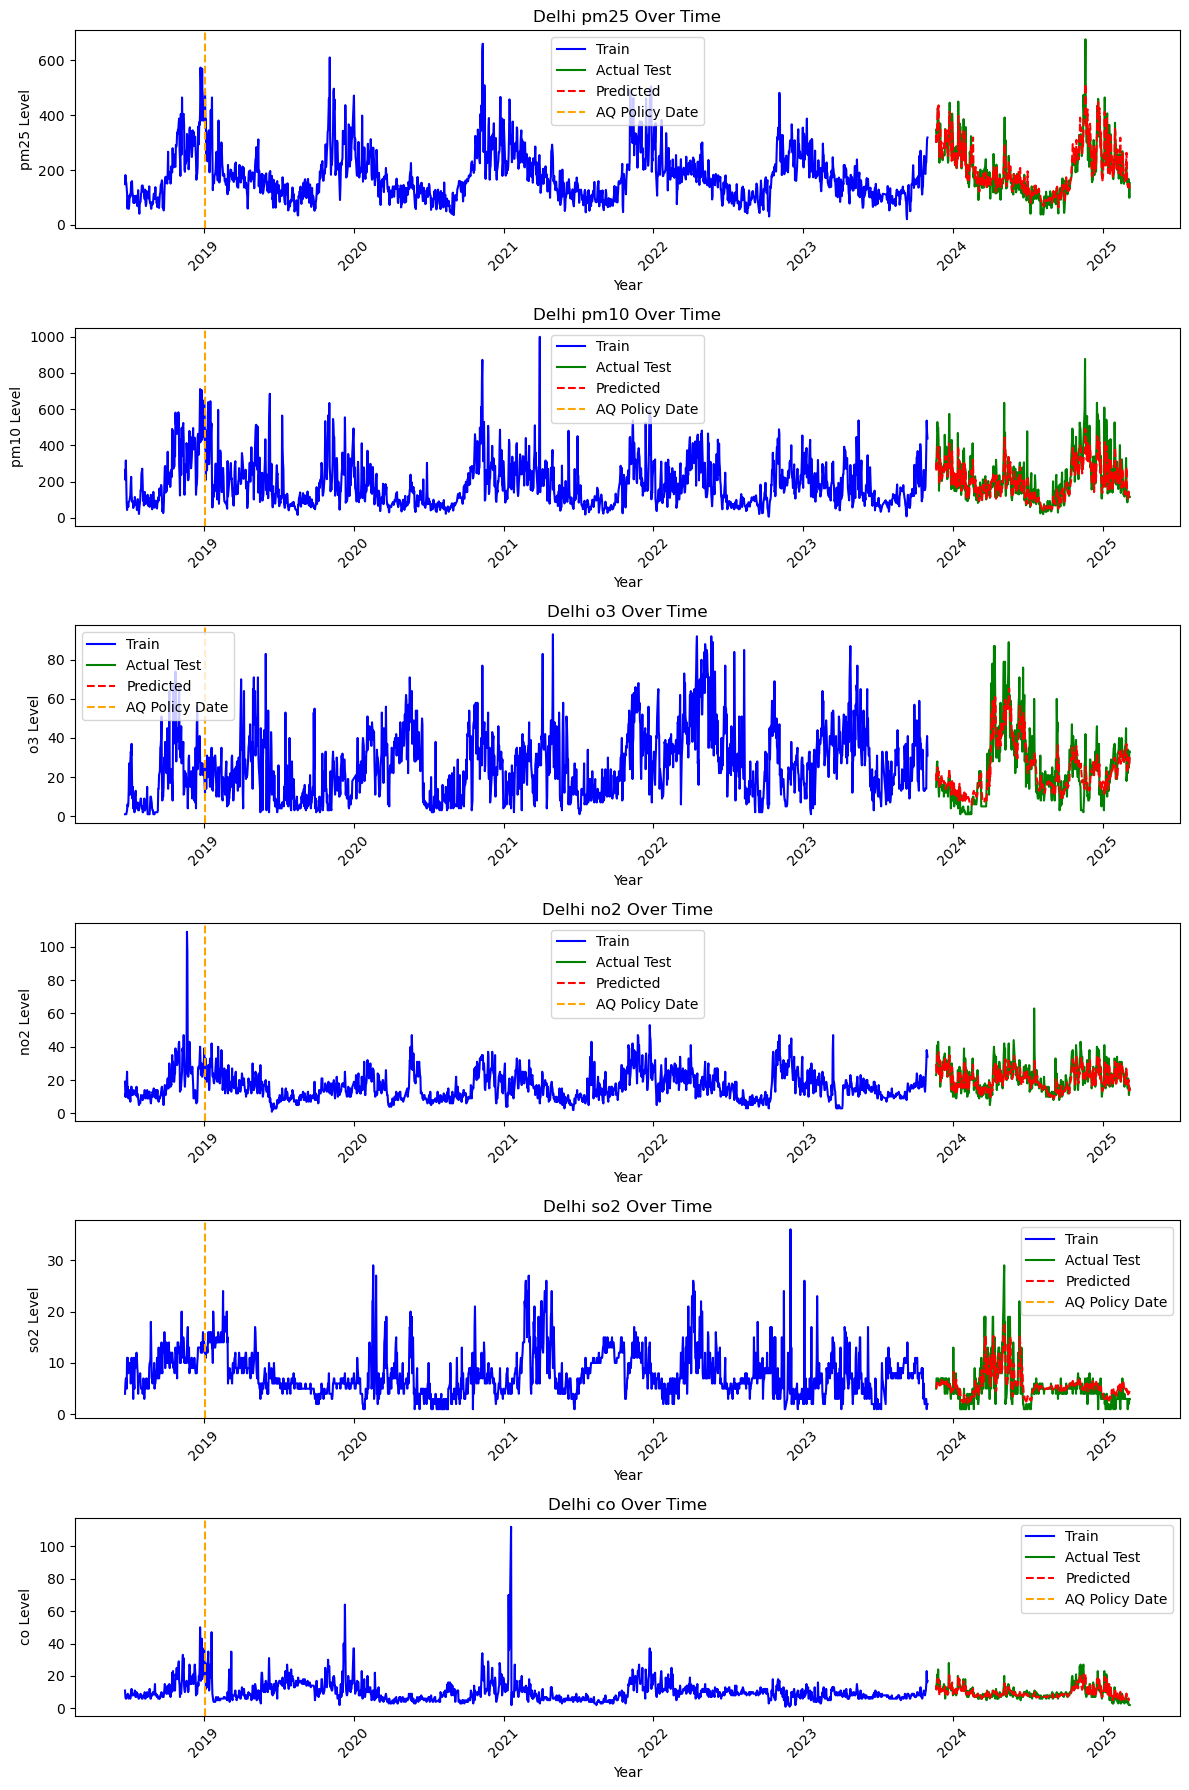

In [175]:
#Plot each pollutant separately
plt.figure(figsize=(12, 18))

for i, pollutant in enumerate(features):
    plt.subplot(6, 1, i + 1)
    plt.plot(train_dates_d, y_train_rescaled_d[:, i], color='blue', label='Train')
    plt.plot(test_dates_d, y_test_rescaled_d[:, i], color='green', label='Actual Test')
    plt.plot(test_dates_d, y_pred_rescaled_d[:, i], color='red', linestyle='dashed', label='Predicted')
    plt.axvline(x=17900, color='orange', linestyle='--', label='Policy Date') #January 2019 National Clean Air Program Air Quality Policy


    plt.xlabel('Year')
    plt.ylabel(f'{pollutant} Level')
    plt.title(f'Delhi {pollutant} Over Time')
    plt.legend()
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

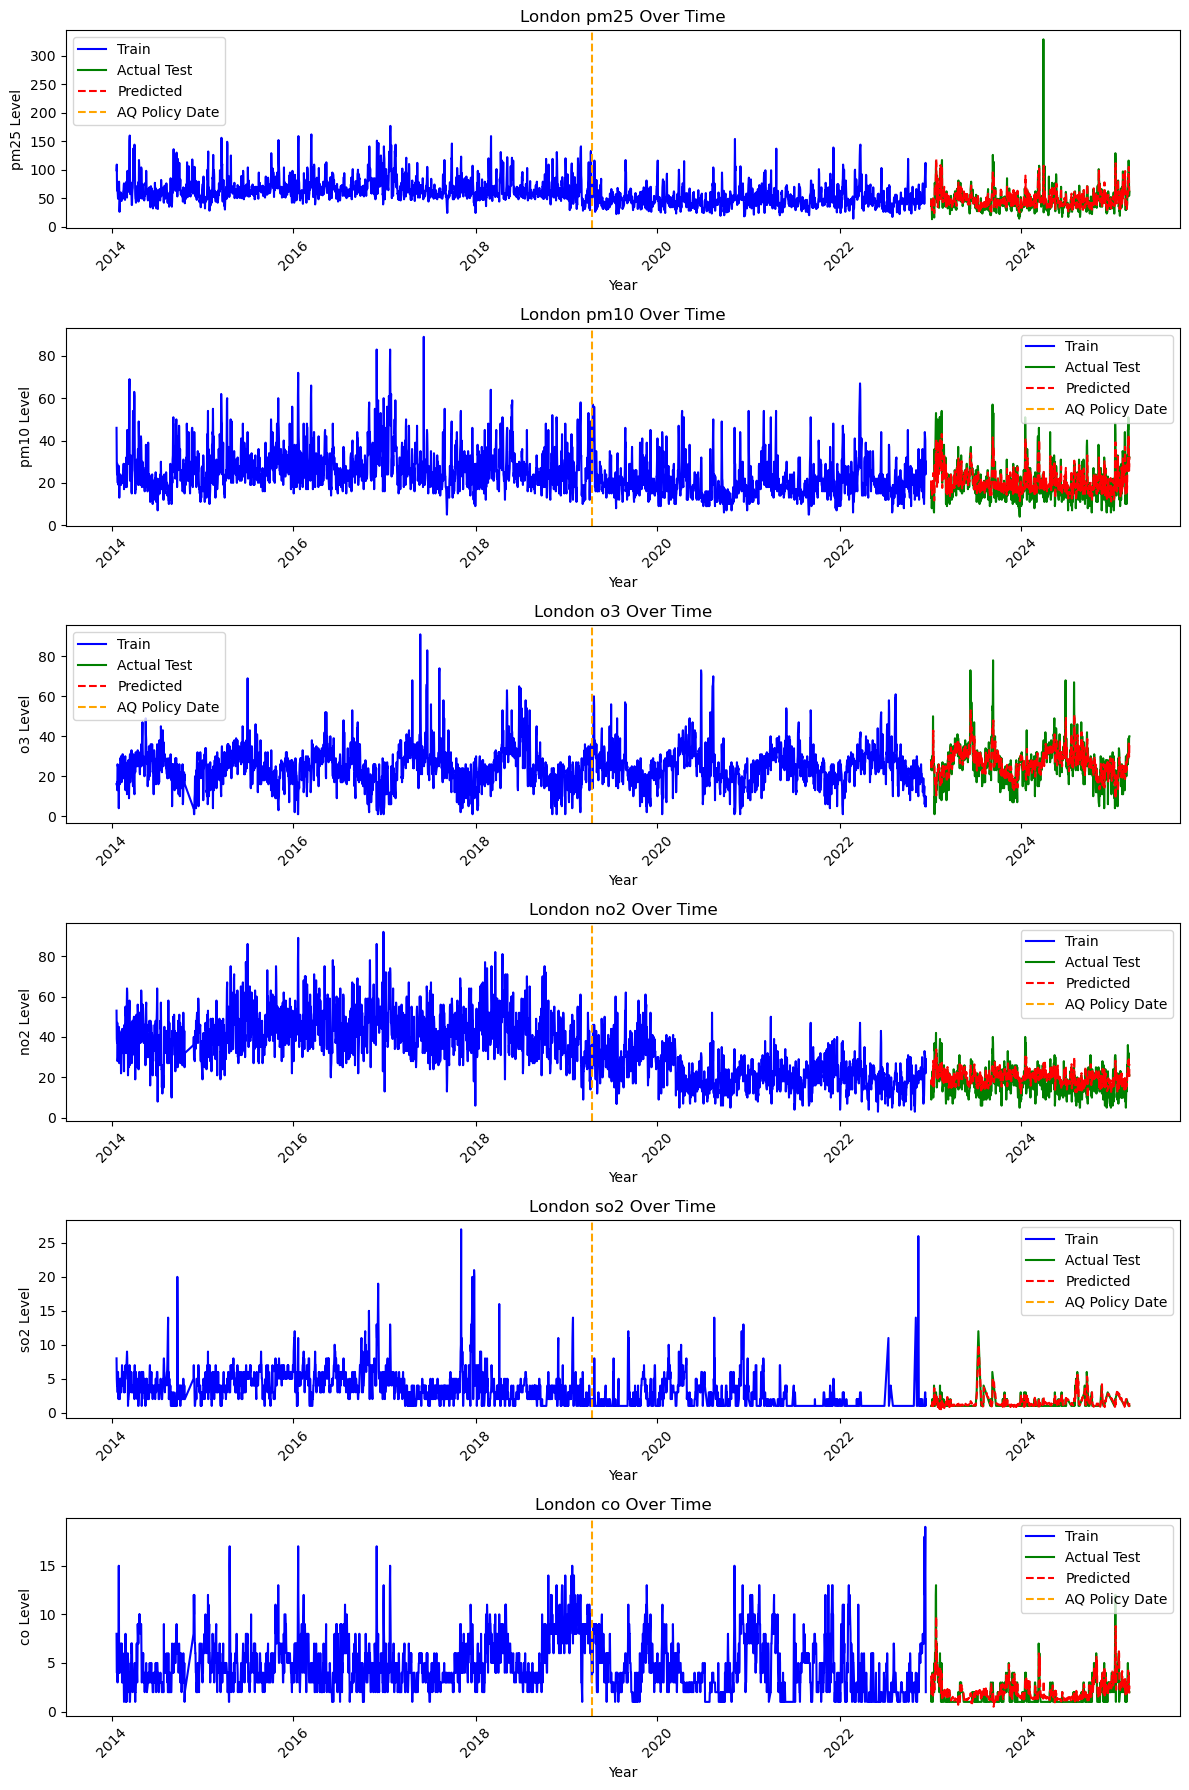

In [177]:
#Plot each pollutant separately
plt.figure(figsize=(12, 18))

for i, pollutant in enumerate(features):
    plt.subplot(6, 1, i + 1)
    plt.plot(train_dates_l, y_train_rescaled_l[:, i], color='blue', label='Train')
    plt.plot(test_dates_l, y_test_rescaled_l[:, i], color='green', label='Actual Test')
    plt.plot(test_dates_l, y_pred_rescaled_l[:, i], color='red', linestyle='dashed', label='Predicted')
    plt.axvline(x=18000, color='orange', linestyle='--', label='Policy Date') #April 8th 2019 London Vehicle Emission Air Quality Policy

    plt.xlabel('Year')
    plt.ylabel(f'{pollutant} Level')
    plt.title(f'London {pollutant} Over Time')
    plt.legend()
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

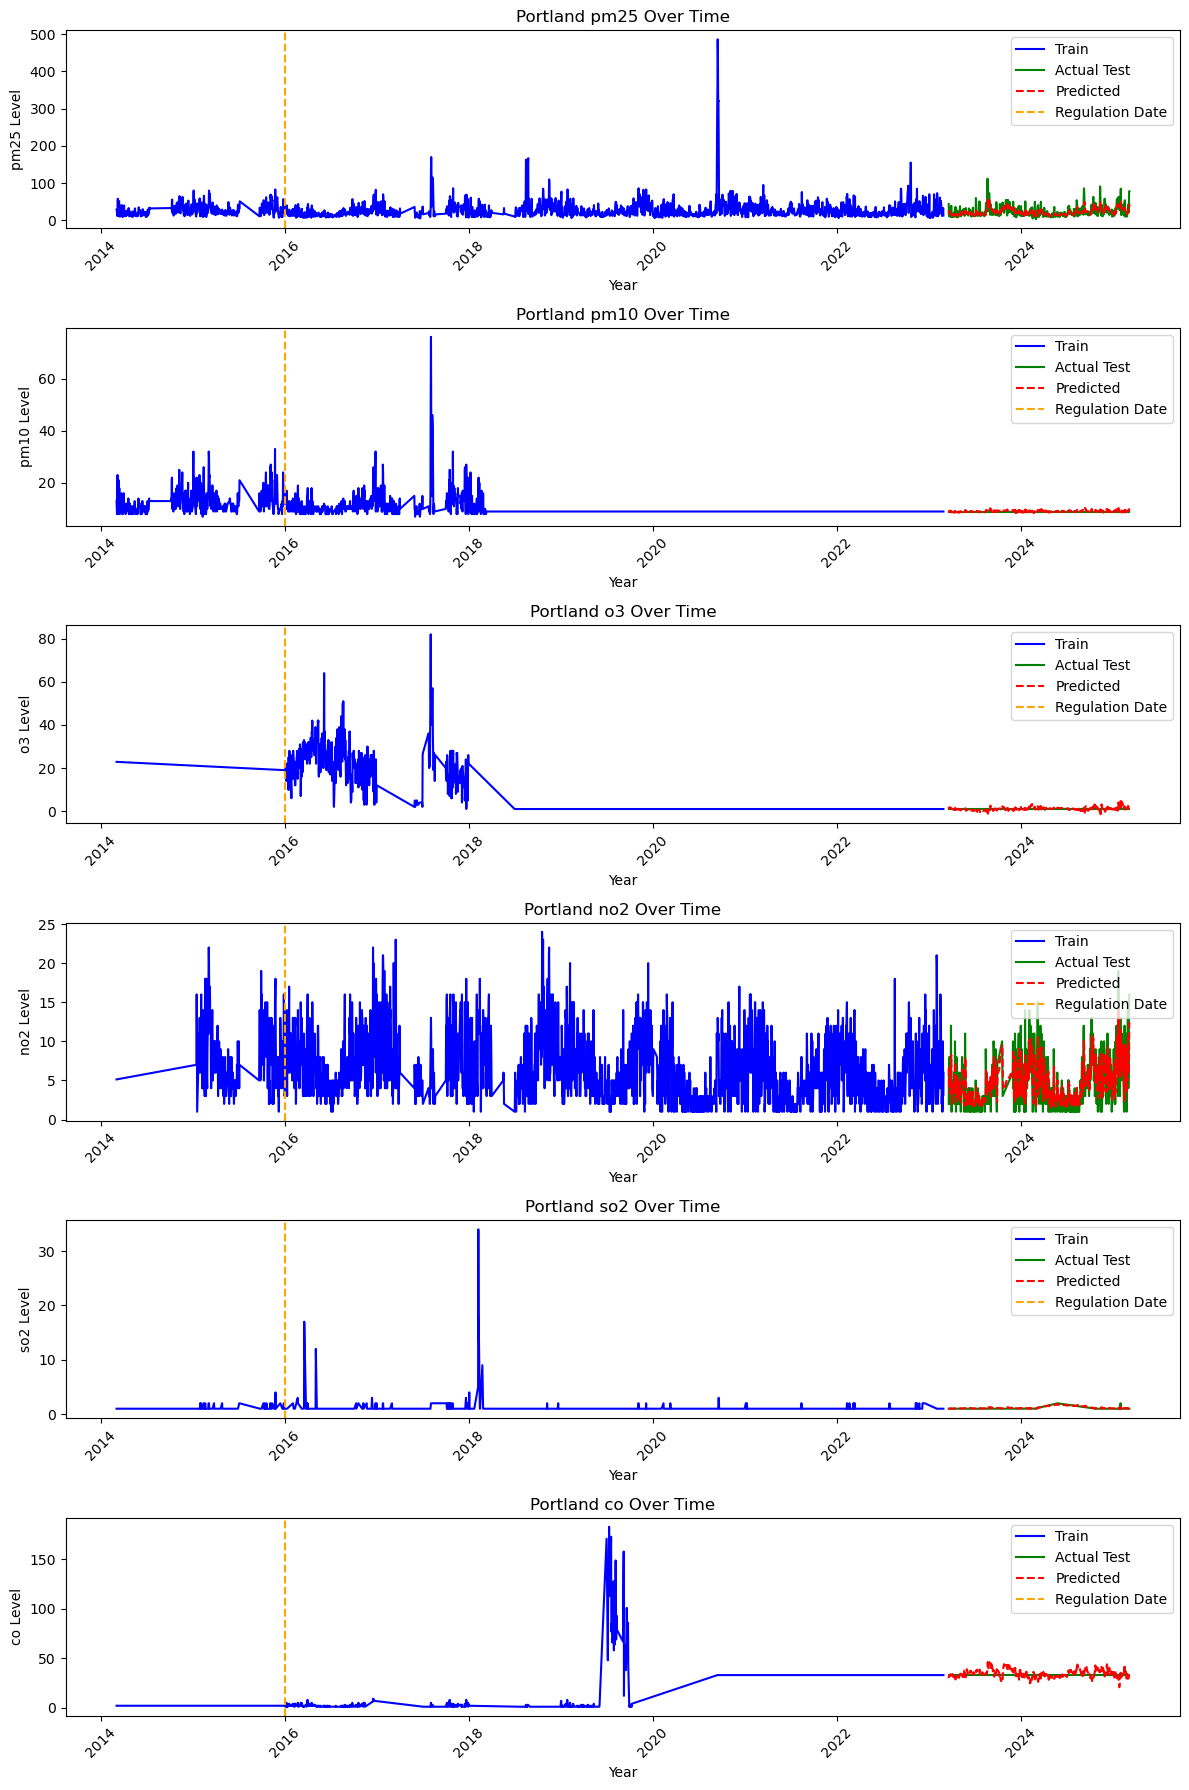

In [179]:
#Plot each pollutant separately
plt.figure(figsize=(12, 18))

for i, pollutant in enumerate(features):
    plt.subplot(6, 1, i + 1)
    plt.plot(train_dates_p, y_train_rescaled_p[:, i], color='blue', label='Train')
    plt.plot(test_dates_p, y_test_rescaled_p[:, i], color='green', label='Actual Test')
    plt.plot(test_dates_p, y_pred_rescaled_p[:, i], color='red', linestyle='dashed', label='Predicted')
    plt.axvline(x=16800, color='orange', linestyle='--', label='Regulation Date') #2016 Glass Plant Regulations


    plt.xlabel('Year')
    plt.ylabel(f'{pollutant} Level')
    plt.title(f'Portland {pollutant} Over Time')
    plt.legend()
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()